In [4063]:
import torch
import torch_dct as dct
from torchvision.utils import save_image
from torchvision.io import read_image
import copy
import numpy as np
import torch.nn.functional as F
from torchvision.transforms import functional
import torchvision.transforms as T
import kornia.augmentation as K

In [4058]:
import matplotlib.pyplot as plt

In [3002]:
img = read_image('/Users/navtegh/Downloads/pika.jpg')

In [4075]:
img = read_image('/Users/navtegh/Downloads/monkey.jpg')

In [4076]:
res1 = int(256 * np.sqrt(0.3))
# res2 = int(img_size * np.sqrt(0.7))
res1 = K.RandomResizedCrop(size=(res1, res1), scale=(1.0,1.0), p=1) # Resize 0.3
        

In [4079]:
Y=res1(img/255)

In [4083]:
scale = np.sqrt(0.3)
new_edges_size = [int(s*scale) for s in img.shape[-2:]][::-1]
if new_edges_size[0]%2==1:
    new_edges_size[0]=new_edges_size[0]+1
    new_edges_size[1]=new_edges_size[1]+1
z=functional.resize(img, new_edges_size)

In [4085]:
save_image(z/255,"z.png")

In [4080]:
save_image(Y,"y.png")

In [4056]:
imgr= functional.rotate(img, 25)

In [4060]:
save_image(imgr/255,"imgr.png")

In [4069]:
l=torch.nn.Sequential(
   K.RandomAffine(degrees=25,p=1),
  # kornia.augmentation.ColorJitter(brightness=0.2, contrast=0.3, saturation=0.2, hue=0.3, p=1)
)

In [4071]:
X=l(img/255)

In [4072]:
save_image(X,"x.png")

In [496]:
img1=img[:,-33:,-32:]

In [497]:
save_image(img1/255,"img1.png")

In [331]:
img2=img1[:,:-4,:-3]

In [332]:
save_image(img2/255,"img2.png")

In [3713]:
img=img.unsqueeze(0)

In [3714]:
img=img.repeat(4,1,1,1)

In [95]:
img = torch.tensor(img, dtype=torch.float)

/var/folders/yp/vbxqsj792y10fn807d171gyc0000gn/T/ipykernel_52842/3286099304.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img, dtype=torch.float)


In [147]:
img.min()

tensor(0, dtype=torch.uint8)

In [3694]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3989]:
def circle_mask(size=256, r=100, x_offset=110, y_offset=-109):
    x0 = y0 = size // 2
    x0 += x_offset
    y0 += y_offset
    y, x = np.ogrid[:size, :size]
    y = y[::-1]
    return ((x - x0)**2 + (y-y0)**2)<= r**2

In [3160]:
img.max()

tensor(255, dtype=torch.uint8)

In [3161]:
img.shape

torch.Size([4, 3, 256, 256])

In [3162]:
img[0,:,:,:].min()

tensor(0, dtype=torch.uint8)

In [3163]:
imgd=dct.dct_2d(img[:,:,:]/255)

In [3164]:
imgd.max()

tensor(239056.5312)

In [3165]:
save_image(imgd,"imgd.png")

In [3166]:
imgi=dct.idct_2d(imgd)

In [3167]:
imgi.max()

tensor(1.0000)

In [3168]:
save_image(imgi,"imgi.png")

In [3169]:
img.min()

tensor(0, dtype=torch.uint8)

In [3920]:
def get_watermarking_pattern( image,w_radius, device):
    gt_init = (image).to(device)
    print(gt_init.shape)
#     gt_patch = torch.fft.fftshift(torch.fft.fft2(gt_init/255))
    gt_patch=dct.dct_2d(gt_init/255)
#     save_image(gt_patch[0,:,:,:],"patch.png")
    gt_patch_tmp = copy.deepcopy(gt_patch)
    save_image(gt_patch_tmp[0,:,:,:],"patch_tmp.png")
    mini=gt_patch.min()
    maxi=gt_patch.max()
    print(mini)
    print(maxi)
    for i in range(w_radius, 0, -1):
        tmp_mask = circle_mask(gt_init.shape[-1], r=i)
        tmp_mask = torch.tensor(tmp_mask).to(device)
        for j in range(gt_patch.shape[1]):
       # gt_patch[:, j, tmp_mask] =gt_patch_tmp[0, j,0,i].item()
            if i % 6 == 0 or i % 6 == 1 or i % 6 == 2:  
                gt_patch[:, j, tmp_mask] =torch.tensor(255)
            else: 
#                 gt_patch[:, j, tmp_mask] =gt_patch_tmp[:, j, tmp_mask]   
                gt_patch[:, j, tmp_mask] =torch.tensor(-255)
#     save_image(gt_patch[0,:,:,:],"gt_patch.png")
    xya=dct.idct_2d(gt_patch)
#     xya=torch.fft.ifft2(torch.fft.ifftshift(gt_patch))
    save_image(xya[0,:,:,:],"xyz.png")
    
    return xya

In [3921]:
inject_img=get_watermarking_pattern(img,15,device)

torch.Size([4, 3, 256, 256])
tensor(-12088.8926)
tensor(138015.0781)


In [3922]:
abc=inject_img[0,:,:,:]

In [3948]:
key=torch.tensor([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
         1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
         1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
        -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
         1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
         1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
        -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
         1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
         1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
         1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
        -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
         1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
         1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.]]).type(torch.float).to(device)

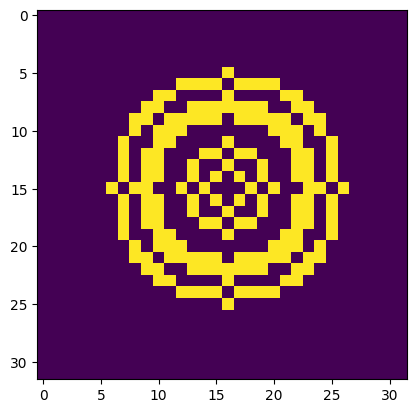

In [3953]:
plt.imshow(key)

In [3954]:
  key=torch.tensor([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
         1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
         1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
        -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
         1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
         1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
        -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
         1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
         1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
         1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
        -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
         1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
         1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.]]).type(torch.float).to(device)

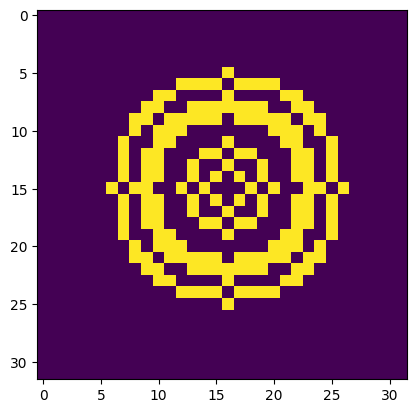

In [3955]:
plt.imshow(key)

In [3923]:
# import torch
# import torchvision.transforms.functional as TF

# # -----------------------------
# # Create Example Input Tensor
# # -----------------------------
# # Simulate an image of shape (3, 256, 256)
# #input_tensor = torch.rand((3, 256, 256))  # Example input image

# # -----------------------------
# # Calculate Crop Parameters
# # -----------------------------
# target_size = 82  # Final size for height and width
# current_size = 256  # Original size of the image

# # Compute cropping boundaries
# crop_margin = (current_size - target_size) // 2  # Amount to crop from each side

# # -----------------------------
# # Crop the Image
# # -----------------------------
# # Use torchvision's functional crop
# cropped_tensor = TF.crop(abc, 
#                          top=crop_margin, 
#                          left=crop_margin, 
#                          height=target_size, 
#                          width=target_size)

# # -----------------------------
# # Output Results
# # -----------------------------
# print("Input tensor shape:", abc.shape)   # Should be [3, 256, 256]
# print("Cropped tensor shape:", cropped_tensor.shape)  # Should be [3, 140, 140]


In [3924]:
# import torch
# import torchvision.transforms as transforms
# from PIL import Image

# # -----------------------------
# # Example: Dummy Input Image Creation
# # -----------------------------
# # Create a random tensor image with shape (3, 140, 140)
# #input_tensor = torch.rand((3, 140, 140))  # Simulating a cropped image

# # -----------------------------
# # Define Resize Transformation
# # -----------------------------
# # The Resize transform expects an image in PIL format or a tensor with shape (C, H, W)
# resize_transform = transforms.Compose([
#     transforms.ToPILImage(),                # Convert tensor to PIL Image
#     transforms.Resize((256, 256)),          # Resize to 256x256
#     transforms.ToTensor()                   # Convert back to torch Tensor
# ])

# # -----------------------------
# # Apply the Transformation
# # -----------------------------
# # Input tensor: Shape [3, 140, 140]
# output_tensor = resize_transform(cropped_tensor)

# # -----------------------------
# # Output Results
# # -----------------------------
# #print("Input tensor shape:", input_tensor.shape)   # Should be [3, 140, 140]
# print("Output tensor shape:", output_tensor.shape) # Should be [3, 256, 256]
# save_image(output_tensor,"resized.png")

In [3925]:
# abc1=dct.dct_2d(output_tensor[:,:,:])

In [3926]:
# save_image(abc1,"resized_w.png")

In [3927]:
abc1=dct.dct_2d(abc[:,:,:])

In [3928]:
save_image(abc,"orig_watermark.png")

In [3929]:
# abc1=torch.fft.fftshift(torch.fft.fft2(abc))

In [3930]:
save_image(abc1,"watermark_no_crop.png")

In [3931]:
abc.shape

torch.Size([3, 256, 256])

In [3932]:
a=abc[:,:,:].sum()/(256*256*3)

In [3933]:
print(a)

tensor(0.4834)


In [3934]:
abc = F.pad(abc, (87, 87, 87, 87), mode='replicate')

In [3935]:
# abc = F.pad(abc, (87, 87, 87, 87), mode='symmetric')

In [3936]:
# abc[:,0:58,:]=torch.tensor(a)

In [3937]:
# abc[:,-58:,:]=torch.tensor(-a)

In [3938]:
# abc[:,:,0:58]=torch.tensor(a)

In [3939]:
# abc[:,:,-58:]=torch.tensor(a/2)

In [3940]:
save_image(abc[:,:,:],"cropped_w.png")

In [3941]:
abc.shape

torch.Size([3, 430, 430])

In [3942]:
imgd=dct.dct_2d(abc[:,:])

In [3943]:
# imgd=torch.fft.fftshift(torch.fft.fft2(abc))

In [3944]:
save_image(imgd,"imgdminpad.png")

In [3945]:
patch.shape

torch.Size([16, 256, 256])

In [3946]:
image.unique()

tensor([0.9962, 0.9963, 0.9964,  ..., 1.0036, 1.0037, 1.0038])

In [3947]:
image.unsqueeze(1).shape

torch.Size([2, 1, 256, 256])

In [3332]:
image.shape

torch.Size([2, 256, 256])

In [3226]:
x=dct.dct_2d(image)

In [3227]:
save_image(x[:,:,:],"out.png")

In [3156]:
x.unique()

tensor([-3.7998e-04, -3.6448e-04, -3.5268e-04,  ...,  1.0002e+00,
         1.0002e+00,  2.6214e+05])

In [3157]:
patch=patch.repeat(2,1,1)

In [3158]:
patch.shape

torch.Size([16, 256, 256])

## image.unique()

In [3064]:
patch.max()

tensor(1.)

In [3065]:
x[1,0,0]=1

In [61]:
patch.unique()

tensor([0., 1.])

In [49]:
import torch.nn.functional as F

In [67]:
F.mse_loss(, x, reduction='mean')

tensor(1.5262e-05)

In [ ]:
def get_watermarking_pattern( image,batch_size,num_channels_latents , height, width,w_radius,w_channel, device):
    gt_init = torch.ones((batch_size,num_channels_latents , height, width)).to(device)
    gt_patch=gt_init
    gt_patch_tmp = copy.deepcopy(gt_patch)
    gt_patch=gt_patch*0
    for i in range(w_radius, 0, -1):
        tmp_mask = circle_mask(gt_init.shape[-1], r=i)
        tmp_mask = torch.tensor(tmp_mask).to(device)            
        for j in range(gt_patch.shape[1]):
            if i % 6 == 0 or i % 6 == 1 or i % 6 == 2:  
                gt_patch[:, j, tmp_mask] = 1
            else: 
                gt_patch[:, j, tmp_mask] = 0
                
    init_latents_w=image.to(device)
    watermarking_mask = torch.zeros(init_latents_w.shape, dtype=torch.bool).to(device)
    np_mask = circle_mask(init_latents_w.shape[-1], r=w_radius)
    torch_mask = torch.tensor(np_mask).to(device)
    torch_mask = torch_mask.repeat(2,1,1)
    watermarking_mask[:,:,w_channel] = torch_mask
    init_latents_w_fft = dct.dct_2d(init_latents_w)
    init_latents_w_fft[watermarking_mask] = gt_patch[watermarking_mask].clone()
    init_latents_w = dct.idct_2d(init_latents_w_fft)  
#    xyz=dct.dct_2d(init_latents_w[0,3,:,:])
    save_image(init_latents_w[0,3,:,:],"latent.png")
    save_image(gt_patch[0,0,:,:],"gt_patch.png")
#     save_image(xyz.real,"xyz_image.png")
    
    return init_latents_w[:,3,:,:], gt_patch[0,0,:,:]

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def log_polar_transform(image, center=None, M=None):
    """
    Applies the log-polar transform to an image.
    Args:
        image: Input image.
        center: Center of the log-polar transform.
        M: Magnification factor for the log-polar transform.
    Returns:
        Transformed image in log-polar coordinates.
    """
    if center is None:
        center = (image.shape[1] // 2, image.shape[0] // 2)
    if M is None:
        M = 40  # Magnification factor (tune this parameter if necessary)
    
    # Perform the log-polar transform
    log_polar_image = cv2.logPolar(
        image, center, M, cv2.INTER_LINEAR + cv2.WARP_FILL_OUTLIERS
    )
    return log_polar_image

def compute_log_polar_error(original, detected):
    """
    Computes the error between the log-polar transformed images.
    Args:
        original: Original watermark image (full).
        detected: Detected watermark image (cropped).
    Returns:
        Error value (L2 loss).
    """
    # Convert images to grayscale if needed
    if len(original.shape) == 3:
        original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    if len(detected.shape) == 3:
        detected = cv2.cvtColor(detected, cv2.COLOR_BGR2GRAY)
    
    # Step 1: Apply log-polar transform
    center_original = (original.shape[1] // 2, original.shape[0] // 2)
    center_detected = (detected.shape[1] // 2, detected.shape[0] // 2)

    log_polar_original = log_polar_transform(original, center=center_original)
    log_polar_detected = log_polar_transform(detected, center=center_detected)

    # Step 2: Resize the detected log-polar image to match the original
    log_polar_detected_resized = cv2.resize(
        log_polar_detected, (log_polar_original.shape[1], log_polar_original.shape[0])
    )

    # Step 3: Compute the L2 error (overlapping part)
    error = np.linalg.norm(log_polar_original - log_polar_detected_resized)

    return error, log_polar_original, log_polar_detected_resized

# Load the images
original_path = "/Users/navtegh/Documents/Watermarking-diffusion-models/original watermark.png"
detected_path = "/Users/navtegh/Documents/Watermarking-diffusion-models/detected watermark.png"

original_image = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
print(original_image.shape)
detected_image = cv2.imread(detected_path, cv2.IMREAD_GRAYSCALE)

# Compute the log-polar error
error, log_polar_original, log_polar_detected_resized = compute_log_polar_error(
    original_image, detected_image
)

# Display Results
print(f"Log-Polar L2 Error: {error}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Detected Image")
plt.imshow(detected_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Log-Polar Difference")
plt.imshow(np.abs(log_polar_original - log_polar_detected_resized), cmap='gray')

plt.tight_layout()
plt.show()


(256, 256)
Log-Polar L2 Error: 33711.713795059426


In [ ]:
def get_watermarking_pattern( image,batch_size,num_channels_latents , height, width,w_radius,w_channel, device):
    gt_init = (image).to(device)
    gt_patch=dct.dct_2d(gt_init/255)
    gt_patch_tmp = copy.deepcopy(gt_patch)
#     gt_patch=gt_patch*0
    for i in range(w_radius, 0, -1):
        tmp_mask = circle_mask(gt_init.shape[-1], r=i)
        tmp_mask = torch.tensor(tmp_mask).to(device)
        for j in range(gt_patch.shape[1]):
            if i % 6 == 0 or i % 6 == 1 or i % 6 == 2:  
                gt_patch[:, j, tmp_mask] = torch.tensor(1, dtype=torch.uint8)
            else: 
                gt_patch[:, j, tmp_mask] = torch.tensor(0, dtype=torch.uint8)
                
#     init_latents_w=image.to(device)
#     watermarking_mask = torch.zeros(init_latents_w.shape, dtype=torch.bool).to(device)
#     np_mask = circle_mask(init_latents_w.shape[-1], r=w_radius)
#     torch_mask = torch.tensor(np_mask).to(device)
#     torch_mask = torch_mask.repeat(2,1,1)
#     watermarking_mask[:,:,w_channel] = torch_mask
#     init_latents_w_fft = dct.dct_2d(init_latents_w)
#     init_latents_w_fft[watermarking_mask] = gt_patch[watermarking_mask].clone()
#     init_latents_w = dct.idct_2d(init_latents_w_fft)  
# #    xyz=dct.dct_2d(init_latents_w[0,3,:,:])
#     save_image(init_latents_w[0,3,:,:],"latent.png")
    save_image(gt_patch[0,:,:,:],"gt_patch.png")
    xya=dct.idct_2d(gt_patch)
    save_image(xya[0,:,:,:],"xyz.png")
#     save_image(xyz.real,"xyz_image.png")
    
    return 0

In [333]:
img_w = read_image('/Users/navtegh/Documents/Watermarking-diffusion-models/imgd0.png')

In [334]:
img_w1=img_w[0,:,:]/255

In [335]:
img_w1=img_w1.unsqueeze(0)

In [336]:
img_w1=img_w1.repeat(4,1,1)

In [337]:
img_w1.shape

torch.Size([4, 256, 256])

In [345]:
def get_watermarking_mask(image,w_radius, device):
    gt_init = (image).to(device)
    gt_patch=gt_init
    gt_init=gt_init*0
    tmp_mask = circle_mask(256, r=w_radius)
    tmp_mask = torch.tensor(tmp_mask).to(device)
    gt_init[:,tmp_mask] = gt_patch[:,tmp_mask]
    save_image(gt_init[0,:,:],"mask.png")
    return gt_init

In [347]:
mask=get_watermarking_mask(img_w1,14,device)

In [4007]:
def get_key(batch,size,w_radius, device):
    gt_init =  torch.zeros((batch, size, size))
    gt_patch = gt_init
    for i in range(w_radius, 0, -1):
        tmp_mask = circle_mask(gt_init.shape[-1], r=i)
        tmp_mask = torch.tensor(tmp_mask).to(device)
        if i % 6 == 0 or i % 6 == 1 or i % 6 == 2:  
            gt_patch[:, tmp_mask] = torch.tensor(0, dtype=torch.uint8)
        else: 
            gt_patch[:, tmp_mask] = torch.tensor(1, dtype=torch.uint8)
    gt_patch=gt_patch[:,-35:,-34:]
    gt_patch=gt_patch[:,:-3,:-2]
    return gt_patch

In [4008]:
key=get_key(16,256,15,device)

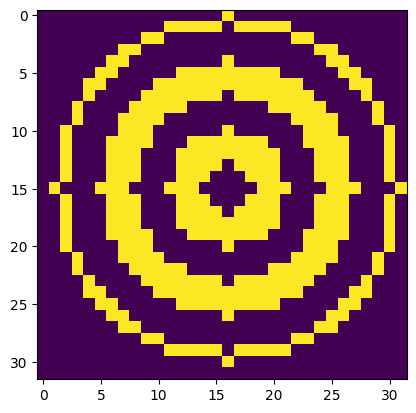

In [4009]:
plt.imshow(key[0,:,:])

In [4045]:
key.shape

torch.Size([16, 1, 256, 256])

In [4046]:
import torch.nn.functional as F

In [4029]:
key=key.unsqueeze(1)

In [4031]:
key=key.repeat(1,1,8,8)

In [4032]:
key.shape

torch.Size([16, 1, 256, 256])

In [4047]:
patches = F.unfold(key, kernel_size=32, stride=32)

In [4048]:
patches.shape

torch.Size([16, 1024, 64])

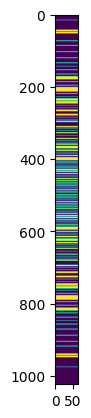

In [4049]:
plt.imshow(patches[0,:,:])

In [4050]:
patches = patches.view(16, 1, 32, 32, -1)

In [4037]:
patches.shape

torch.Size([16, 1, 32, 32, 64])

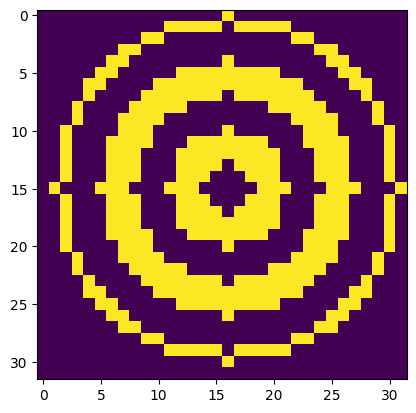

In [4052]:
plt.imshow(patches[0,0,:,:,15])

In [4038]:
patches_mean = patches.mean(dim=-1)

In [4039]:
patches_mean.shape

torch.Size([16, 1, 32, 32])

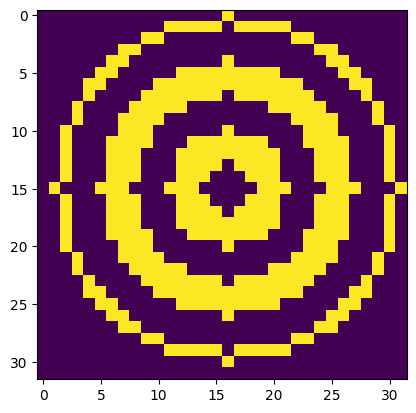

In [4042]:
plt.imshow(patches_mean[0,0,:,:])

In [4013]:
abc=key[0,:,:]

In [4015]:
import numpy as np

In [4016]:
np.set_printoptions(threshold=np.inf)

In [4019]:
a=np.asarray(abc)

In [4021]:
b=2*a-1

In [4022]:
print(b)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1.
   1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
  -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.
   1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1. -1.

In [4023]:
np.savetxt("key.txt", b, fmt='%d')

In [4024]:
b

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
         1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
        -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
         1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,
  

In [300]:
new_edges_size=[181,181]
print(new_edges_size[:])

[181, 181]


In [295]:
if new_edges_size[0]%2==1:
        new_edges_size[0]=new_edges_size[0]+1
        new_edges_size[1]=new_edges_size[1]+1

TypeError: can only concatenate list (not "int") to list

In [292]:
print(new_edges_size[0])

182
